# Pymaceuticals Inc.
---

### Analysis
- ADD ANALYSIS

## Setup

In [1]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# set up data files paths
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# read in data into dataframes
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

## Prepare Data

In [3]:
# combine both dataframes
complete_study_df = pd.merge(study_results_df, mouse_metadata_df, on='Mouse ID')

# display merged data
complete_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# show number of rows and columns
complete_study_df.shape

(1893, 8)

In [5]:
# check number of mice
complete_study_df['Mouse ID'].nunique()

249

In [6]:
# bool to find duplicates based on mouse id's and time points
duplicates = complete_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# list of mouse id's with duplicate time points
duplicate_ids = complete_study_df[duplicates]['Mouse ID'].unique()

# data associated with duplicate ids
duplicate_ids_df = complete_study_df[complete_study_df['Mouse ID'].isin(duplicate_ids)]

# display duplicate id's and rows they're in
print(duplicate_ids)
duplicate_ids_df

['g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# remove listed duplicate values
cleaned_study_df = complete_study_df[~complete_study_df['Mouse ID'].isin(duplicate_ids)]

# display cleaned df
cleaned_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# check number of unique mouse id's in cleaned df
cleaned_study_df['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
# groupby drug regimen
drug_grp = cleaned_study_df.groupby('Drug Regimen')

# create summary stats for tumor volume by drug regimen
summary_stats_df = drug_grp.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# display results
summary_stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

### Bar Charts

In [10]:
# count number of rows for each drug regimen to plot
drug_cnts_df = cleaned_study_df['Drug Regimen'].value_counts()

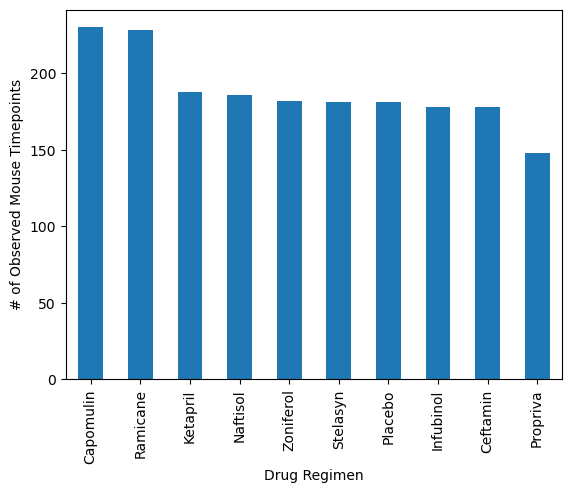

In [11]:
# pandas bar plot: show the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_cnts_plot = drug_cnts_df.plot(kind='bar', ylabel='# of Observed Mouse Timepoints')

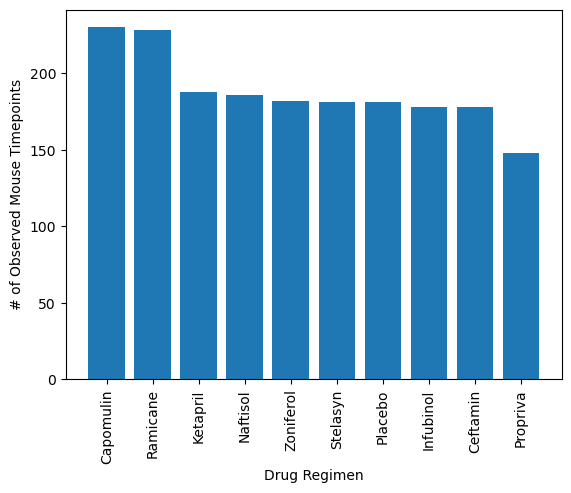

In [12]:
# pyplot bar plot: show the total number of rows (Mouse ID/Timepoints) for each drug regimen
plt.bar(drug_cnts_df.index, drug_cnts_df)

# edit plot
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# show plot
plt.show()

### Pie Charts

In [13]:
# get df without duplicate mouse id's
unique_mice_df = cleaned_study_df.drop_duplicates(subset='Mouse ID')

# calculate male vs female 
gender_cnts_df = unique_mice_df['Sex'].value_counts()

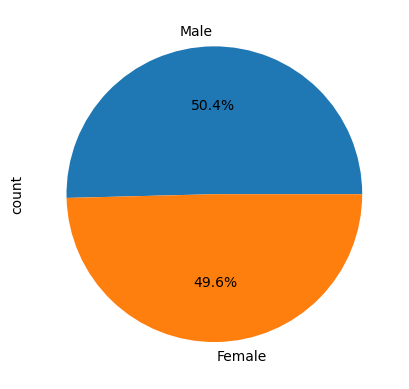

In [14]:
# pandas pie chart: show the distribution of unique female versus male mice
gender_dist_chart = gender_cnts_df.plot(kind='pie', autopct='%1.1f%%')

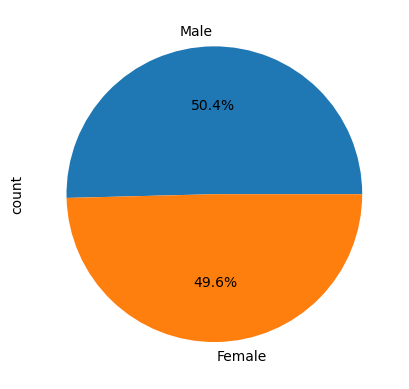

In [15]:
# pyplot pie chart: show the distribution of unique female versus male mice
plt.pie(gender_cnts_df, labels=gender_cnts_df.index, autopct='%1.1f%%')
plt.ylabel('count')

# show plot
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# create df of only max timepoints for each mouse

# groupby mouse id
mouse_id_grp = cleaned_study_df.groupby('Mouse ID')

# get maximum timepoints per mouse
max_timepoints_df = cleaned_study_df.loc[mouse_id_grp['Timepoint'].idxmax()].reset_index(drop=True)

# display df
max_timepoints_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [17]:
# define drug list and empty dictionary to store data
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_data_dict = {}  # dictionary to store tumor volumes for each drug

print("-----------------------------")

# Loop through each drug in the treatment list
for drug in drug_list:

    # filter data for the current drug regimen
    drug_data = max_timepoints_df[max_timepoints_df['Drug Regimen'] == drug]
    drug_data_dict[drug] = drug_data['Tumor Volume (mm3)']

    # quartile calculations
    quartiles = drug_data['Tumor Volume (mm3)'].quantile([.25, .5, .75])
    iqr = quartiles[0.75] - quartiles[0.25]

    # calculate lower and upper bounds for outliers
    lower_bound = quartiles[0.25] - (1.5 * iqr)
    upper_bound = quartiles[0.75] + (1.5 * iqr)

    # identify possible outliers
    lower_outliers = drug_data[drug_data['Tumor Volume (mm3)'] < lower_bound]
    upper_outliers = drug_data[drug_data['Tumor Volume (mm3)'] > upper_bound]

    # print iqr and outlier results
    print(drug)
    print("-----------------------------")
    print(f"IQR: {iqr}")
    print(f"Potential outliers:")
    print(f"   Below {lower_bound:.2f}: {lower_outliers['Tumor Volume (mm3)'].values if not lower_outliers.empty else 'None'}")
    print(f"   Above {upper_bound:.2f}: {upper_outliers['Tumor Volume (mm3)'].values if not upper_outliers.empty else 'None'}")
    print("-----------------------------")

-----------------------------
Capomulin
-----------------------------
IQR: 7.781863460000004
Potential outliers:
   Below 20.70: None
   Above 51.83: None
-----------------------------
Ramicane
-----------------------------
IQR: 9.098536719999998
Potential outliers:
   Below 17.91: None
   Above 54.31: None
-----------------------------
Infubinol
-----------------------------
IQR: 11.477135160000003
Potential outliers:
   Below 36.83: [36.3213458]
   Above 82.74: None
-----------------------------
Ceftamin
-----------------------------
IQR: 15.577752179999997
Potential outliers:
   Below 25.36: None
   Above 87.67: None
-----------------------------


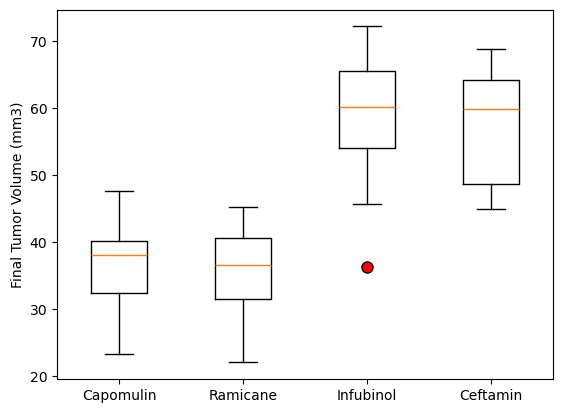

In [18]:
# define outlier's appearnace
flierprops = dict(marker='o', markerfacecolor='red', markersize=8)

# create boxplots for each drug on the same plot
plt.boxplot([drug_data_dict[drug] for drug in drug_list], labels=drug_list, flierprops=flierprops)
plt.ylabel("Final Tumor Volume (mm3)")

# show plot
plt.show()

## Line and Scatter Plots

In [19]:
# collect capomulin data for plots
capomulin_df = cleaned_study_df[cleaned_study_df['Drug Regimen']=='Capomulin']

### Line Plot

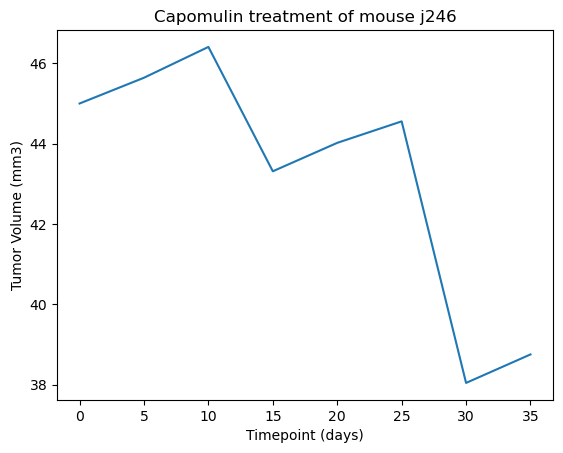

In [22]:
# randomly select a mouse from Capomulin drug
random_mouse = capomulin_df['Mouse ID'].sample(n=1).values[0]

# get data for random mouse
random_mouse_df = capomulin_df[capomulin_df['Mouse ID']==random_mouse]

# line chart: tumor volume over time for the random mouse
capomulin_line_plot = random_mouse_df.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)', 
                                           xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)',
                                           title=f'Capomulin treatment of mouse {random_mouse}',
                                           legend=False)

### Scatter Plot

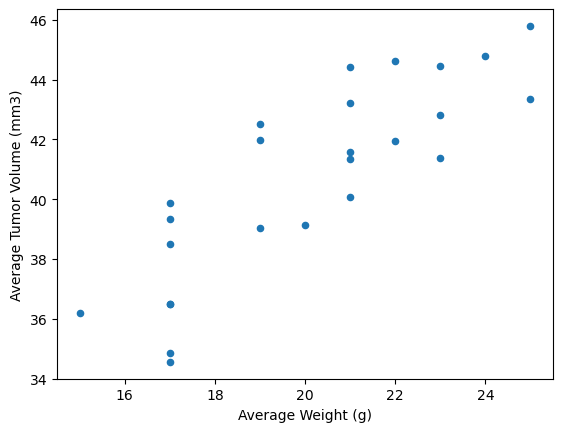

In [21]:
# groupby mouse id
capomulin_id_grp = capomulin_df.groupby('Mouse ID')

# calculate average tumor volume and weight for each mouse ID
capomulin_avgs_df = capomulin_id_grp.agg(
    **{
        'Average Tumor Volume (mm3)': ('Tumor Volume (mm3)','mean'),
        'Average Weight (g)': ('Weight (g)', 'mean')
    }
)

# scatter plot: average tumor volume vs average mouse weight for Capomulin regimen
capomulin_scatter_plot = capomulin_avgs_df.plot(kind='scatter', x='Average Weight (g)', y='Average Tumor Volume (mm3)')